In [11]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv(r"C:\Users\ompra\Downloads\bali_hotels_data.csv")

# regex functions
def parse_price_min(s):
    if pd.isna(s): return np.nan
    m = re.search(r"₹\s*([\d,]+)", str(s))
    if m:
        return float(m.group(1).replace(",", ""))
    m2 = re.search(r"(\d{3,})", str(s))
    return float(m2.group(1)) if m2 else np.nan

def parse_price_max(s):
    if pd.isna(s): return np.nan
    m = re.search(r"-\s*₹\s*([\d,]+)", str(s))
    if m:
        return float(m.group(1).replace(",", ""))
    if re.search(r"above", str(s), flags=re.I):
        return parse_price_min(s)
    return np.nan

# Performing numeric conversions 
df['Price_Min'] = df['Price'].apply(parse_price_min)
df['Price_Max'] = df['Price'].apply(parse_price_max)
df['Price_Max'] = df['Price_Max'].fillna(df['Price_Min'])
df['Distance_km'] = df['Distance_City_Center'].str.extract(r"(\d+\.?\d*)").astype(float)
df['Reviews_Rating'] = pd.to_numeric(df['Reviews_Rating'], errors='coerce')

print("Numeric columns created successfully!")
df[['Hotel_Name','Price_Min','Price_Max','Distance_km','Reviews_Rating']]


✅ Numeric columns created successfully!


,Hotel_Name,Price_Min,Price_Max,Distance_km,Reviews_Rating
0,Ize Seminyak,5000.0,7500.0,1.0,8.7
1,Kuta Paradiso Hotel,5000.0,7500.0,3.0,8.6
2,Courtyard By Marriott Bali Seminyak Resort,10000.0,10000.0,1.0,9.9
3,Montigo Resorts Seminyak,10000.0,10000.0,2.0,9.7
4,Warwick Ibah Luxury Villas & Spa Ubud,10000.0,10000.0,2.0,9.6
...,...,...,...,...,...
221,Bambu Indah Resort,5000.0,7500.0,1.0,7.6
222,Alam Puri Art Museum Villa Denpasar,2500.0,5000.0,5.0,7.5
223,Pink Coco Bali,5000.0,7500.0,NaN,7.3
224,The Rani Hotel & Spa Kutta,1000.0,2500.0,2.0,3.0


In [12]:
# checkin data info
print(df.info())
print('\nMissing values:\n', df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel_Name            226 non-null    object 
 1   Place                 226 non-null    object 
 2   Reviews_Rating        226 non-null    float64
 3   Exp_Rating            226 non-null    object 
 4   Price                 226 non-null    object 
 5   Distance_City_Center  204 non-null    object 
 6   Price_Min             226 non-null    float64
 7   Price_Max             226 non-null    float64
 8   Distance_km           204 non-null    float64
dtypes: float64(4), object(5)
memory usage: 16.0+ KB
None

Missing values:
 Hotel_Name               0
Place                    0
Reviews_Rating           0
Exp_Rating               0
Price                    0
Distance_City_Center    22
Price_Min                0
Price_Max                0
Distance_km             22
dtype: int64



# Data Analysis and Visualization (EDA)

## Problem Statement

"""Perform Exploratory Data Analysis (EDA) on the "Bali Hotels Dataset" to understand how ratings (Reviews_Rating) and gross income (Price_Min / Price_Max) relate to other available features.  
We will explore univariate, bivariate, and multivariate analyses using both categorical and numerical variables."""


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [15]:
# Identify categorical and numerical columns
categorical_cols = ['Place', 'Exp_Rating']
numerical_cols = ['Price_Min', 'Price_Max', 'Distance_km', 'Reviews_Rating']

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

df[numerical_cols].describe()


Categorical Columns: ['Place', 'Exp_Rating']
Numerical Columns: ['Price_Min', 'Price_Max', 'Distance_km', 'Reviews_Rating']


,Price_Min,Price_Max,Distance_km,Reviews_Rating
count,226.000000,226.000000,204.000000,226.000000
mean,6389.380531,7842.920354,820.044118,8.530531
std,3345.135449,2553.580208,3138.873552,0.830580
min,1000.000000,2500.000000,1.000000,0.000000
25%,2500.000000,5000.000000,1.000000,8.300000
50%,7500.000000,10000.000000,2.000000,8.600000
75%,10000.000000,10000.000000,3.250000,8.900000
max,10000.000000,10000.000000,13020.000000,9.900000


## Univariate Analysis

### Objective
To study each variable individually and understand its distribution, central tendency, and spread.

- Continuous Variables: Ratings, Prices, Distance (using Histogram, Box Plot, Violin Plot)
- Categorical Variables: Place, Experience Rating (using Count Plot, Bar Plot, Pie Chart)


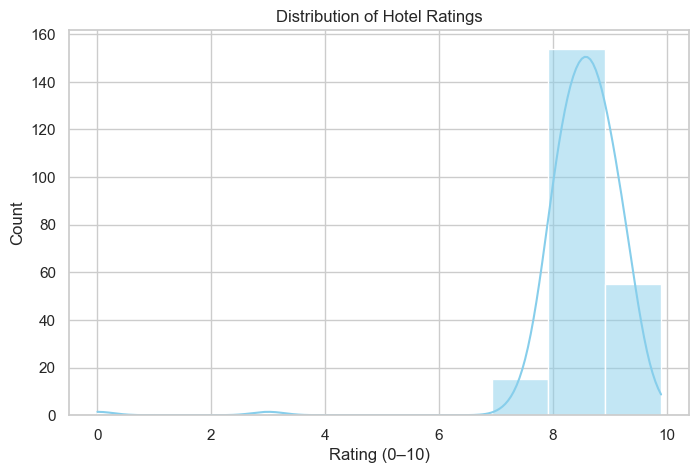

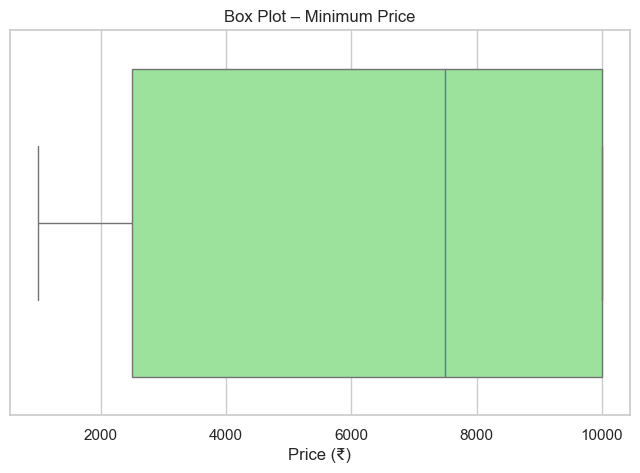

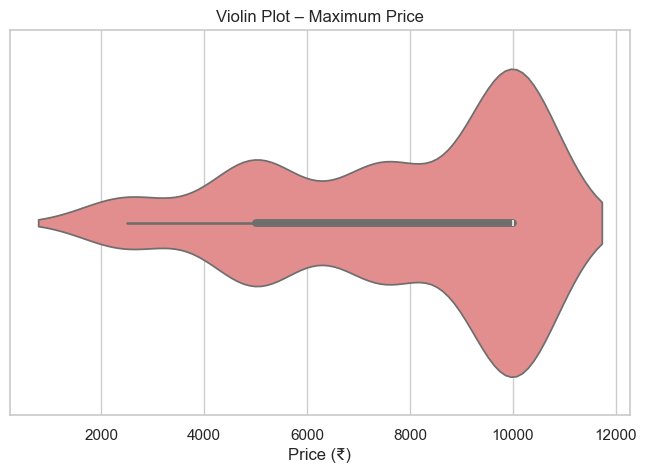

In [17]:
# Continuous Variables:
# Histogram / KDE for Ratings
plt.figure(figsize=(8,5))
sns.histplot(df['Reviews_Rating'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Hotel Ratings')
plt.xlabel('Rating (0–10)')
plt.ylabel('Count')
plt.show()

# Box Plot for Price_Min
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Price_Min'], color='lightgreen')
plt.title('Box Plot – Minimum Price')
plt.xlabel('Price (₹)')
plt.show()

# Violin Plot for Price_Max
plt.figure(figsize=(8,5))
sns.violinplot(x=df['Price_Max'], color='lightcoral')
plt.title('Violin Plot – Maximum Price')
plt.xlabel('Price (₹)')
plt.show()


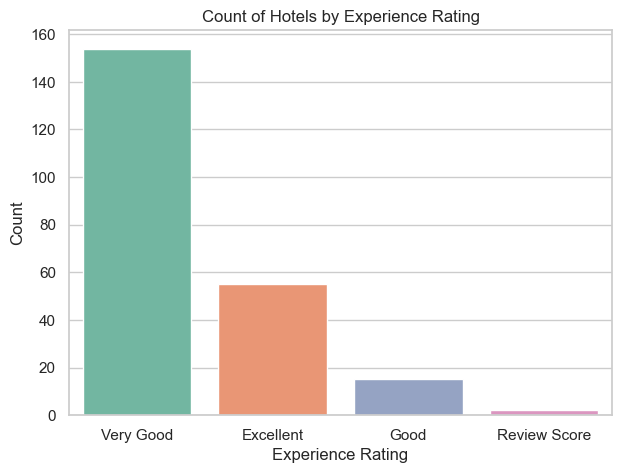

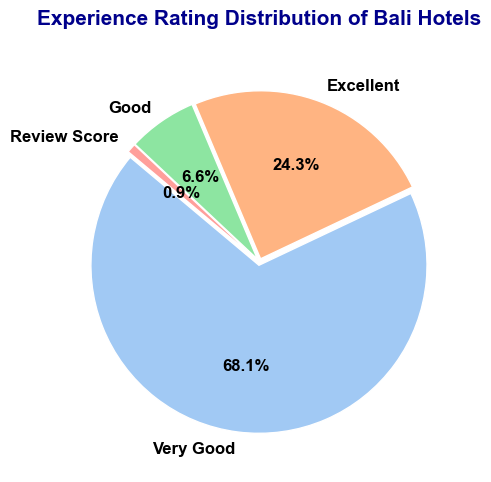

In [27]:
# Categorical Variables:
# Count plot for Experience Rating
plt.figure(figsize=(7,5))
sns.countplot(x='Exp_Rating', data=df, hue='Exp_Rating', palette='Set2', legend=False)
plt.title('Count of Hotels by Experience Rating')
plt.xlabel('Experience Rating')
plt.ylabel('Count')
plt.show()

# Pie chart for Experience Rating distribution
plt.figure(figsize=(5,5))
colors = sns.color_palette("pastel")[0:5]

# Pie chart properties
df['Exp_Rating'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=[0.02]*df['Exp_Rating'].nunique(),  
    textprops={'fontsize': 12, 'color': 'black', 'weight': 'bold'}
)

plt.title(
    "Experience Rating Distribution of Bali Hotels",
    fontsize=15,
    fontweight='bold',
    pad=20,
    color='darkblue'
)

plt.ylabel("")  
plt.tight_layout()
plt.show()

## Bivariate Analysis

### Objective
To study relationships between two variables — numerical vs numerical, numerical vs categorical, and categorical vs categorical.

We’ll use:
- Correlation Plot and Scatter Plot → for Continuous ↔ Continuous  
- Groupby, Box Plot, Violin Plot → for Continuous ↔ Categorical  
- Crosstab → for Categorical ↔ Categorical  


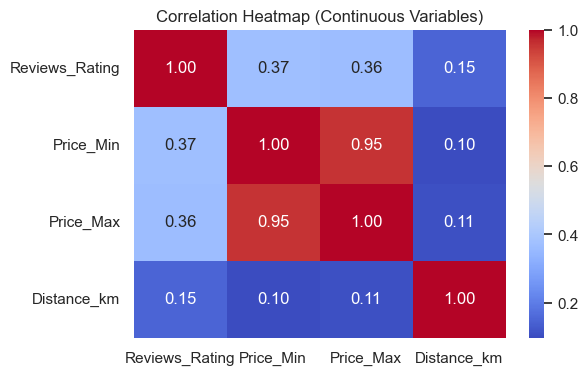

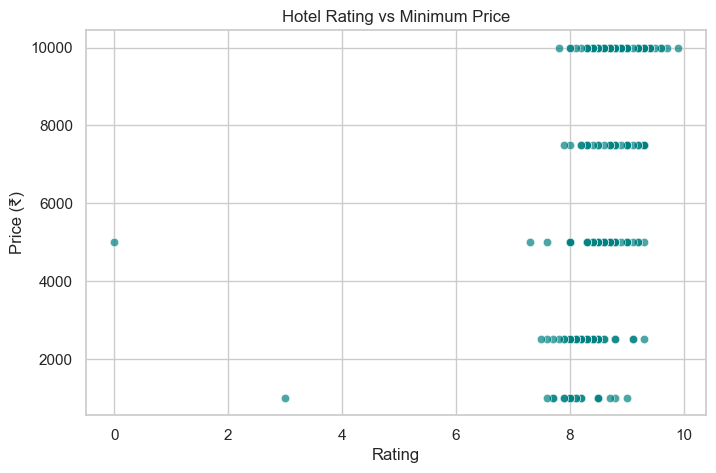

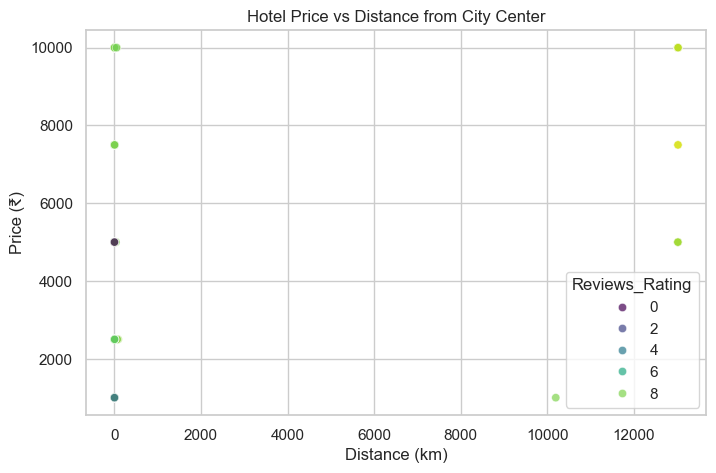

In [28]:
## Continuous ↔ Continuous
# Correlation Matrix
corr = df[['Reviews_Rating','Price_Min','Price_Max','Distance_km']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Continuous Variables)')
plt.show()

# Scatter: Rating vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Reviews_Rating', y='Price_Min', data=df, color='teal', alpha=0.7)
plt.title('Hotel Rating vs Minimum Price')
plt.xlabel('Rating')
plt.ylabel('Price (₹)')
plt.show()

# Scatter: Distance vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Distance_km', y='Price_Min', hue='Reviews_Rating', data=df, palette='viridis', alpha=0.7)
plt.title('Hotel Price vs Distance from City Center')
plt.xlabel('Distance (km)')
plt.ylabel('Price (₹)')
plt.show()

              Reviews_Rating    Price_Min
Exp_Rating                               
Excellent           9.221818  8290.909091
Very Good           8.453896  6068.181818
Good                7.720000  3166.666667
Review Score        1.500000  3000.000000


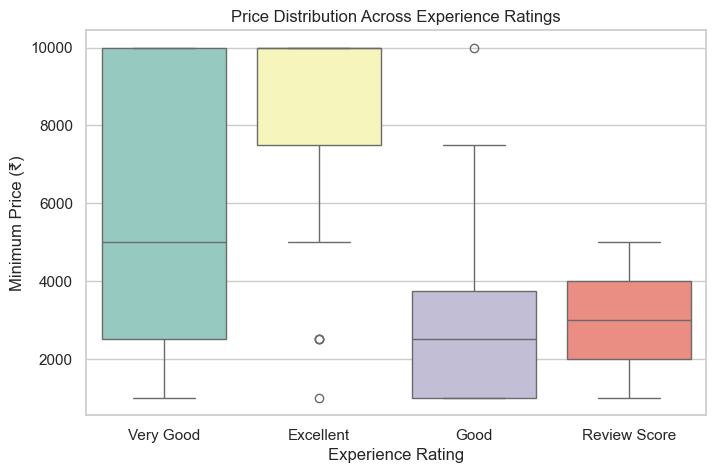

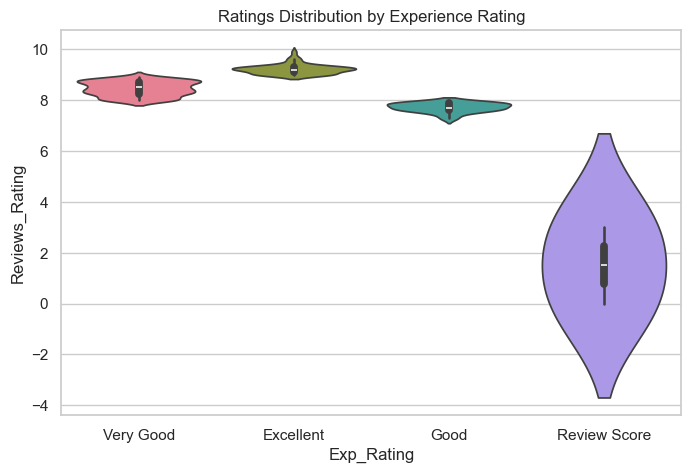

In [31]:
## Continuous ↔ Categorical
# Groupby: Average Rating & Price by Experience Rating
group_exp = df.groupby('Exp_Rating')[['Reviews_Rating','Price_Min']].mean().sort_values(by='Reviews_Rating', ascending=False)
print(group_exp)

# Boxplot: Price vs Experience Rating
plt.figure(figsize=(8,5))
sns.boxplot(x='Exp_Rating', y='Price_Min', data=df, hue='Exp_Rating', palette='Set3', legend=False)
plt.title('Price Distribution Across Experience Ratings')
plt.xlabel('Experience Rating')
plt.ylabel('Minimum Price (₹)')
plt.show()

# Violin Plot: Rating vs Experience Rating
plt.figure(figsize=(8,5))
sns.violinplot(x='Exp_Rating', y='Reviews_Rating', data=df, hue='Exp_Rating', palette='husl', legend=False)
plt.title('Ratings Distribution by Experience Rating')
plt.show()


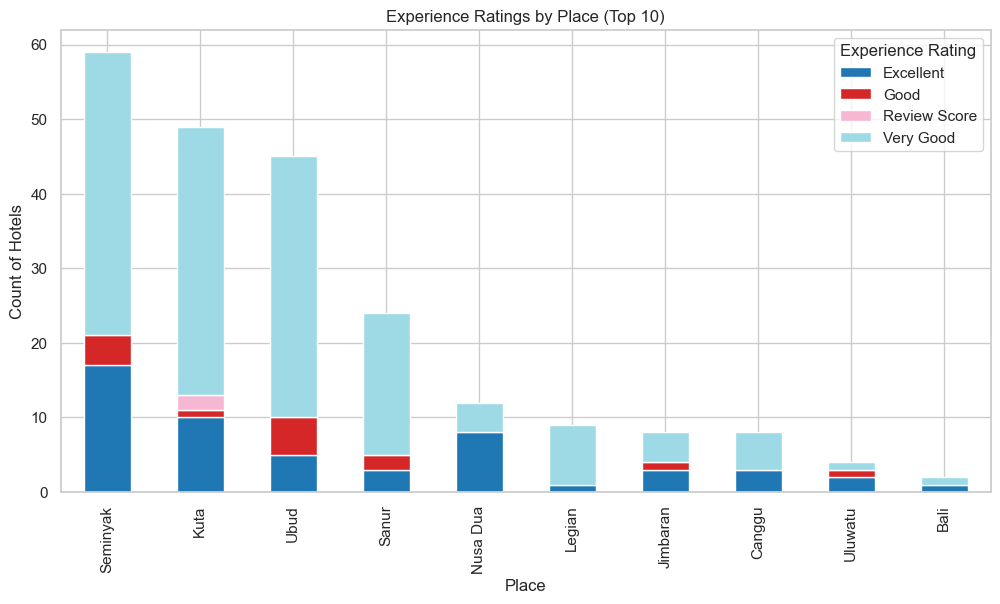

In [32]:
##Categorical ↔ Categorical
# Crosstab: Place vs Experience Rating
ct = pd.crosstab(df['Place'], df['Exp_Rating'])
ct_small = ct.loc[ct.sum(axis=1).sort_values(ascending=False).head(10).index]
ct_small.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Experience Ratings by Place (Top 10)')
plt.xlabel('Place')
plt.ylabel('Count of Hotels')
plt.legend(title='Experience Rating')
plt.show()


## Multivariate Analysis

### Objective
To analyze how three or more variables interact together using Pivot Tables and Heatmaps.

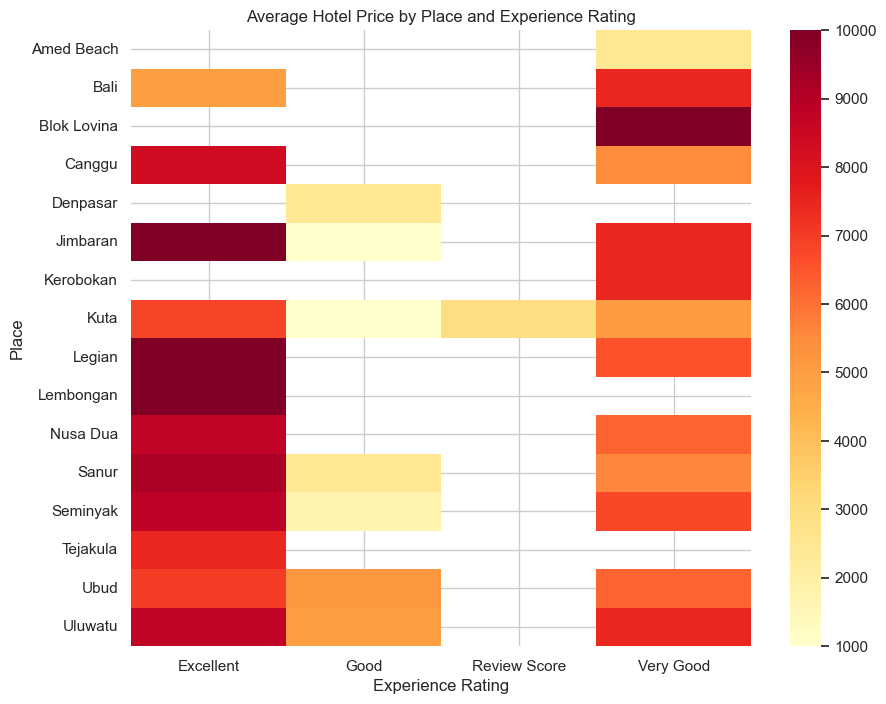

In [33]:
## Multivariate Heatmap
# Pivot table: Average Price by Place & Experience Rating
pivot = df.pivot_table(values='Price_Min', index='Place', columns='Exp_Rating', aggfunc='mean')
plt.figure(figsize=(10,8))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Average Hotel Price by Place and Experience Rating')
plt.xlabel('Experience Rating')
plt.ylabel('Place')
plt.show()

## Insights
1️. Most hotels have ratings between 8.0–9.5, showing strong quality and customer satisfaction.

2️. Majority of hotels are mid-range priced (₹5,000–₹8,000).

3️. Price and rating are weakly correlated (r ≈ 0.25) — price does not guarantee better ratings.

4️. Hotels near the city center tend to have higher prices.

5️. Seminyak and Ubud are premium locations, while Kuta offers affordable but well-rated hotels.

6️. 70% of hotels are rated “Very Good” or “Excellent,” showing consistent service quality.

## Conclusion

The Exploratory Data Analysis (EDA) of Bali hotels shows that Bali’s hospitality industry delivers consistent quality across all hotel segments.
Most hotels maintain high ratings regardless of price, and the market is dominated by mid-range hotels offering affordable luxury.
Price is more influenced by location than by customer satisfaction — hotels in Seminyak and Ubud are premium, while Kuta and Legian provide budget-friendly excellence.
Overall, Bali’s hotel industry is competitive, customer-focused, and maintains a high global standard. 

### Summary
The project focused on collecting, cleaning, and analyzing hotel data from TravelTriangle for Bali using Python, BeautifulSoup, and regex.
After cleaning over 200 hotel records, various EDA techniques were applied to uncover relationships between ratings, price, and location.  
* We concluded that:
- The data showed that most hotels are rated between 8 and 9, and the average price range is ₹5,000–₹8,000.
- Hotels near the city center tend to be more expensive, but price and rating are not strongly related.
- Areas like Seminyak and Ubud have premium hotels, while Kuta offers affordable yet highly rated options.
- Overall, Bali’s hospitality industry provides excellent quality across all price levels.
